# Exploratory Data Analysis (EDA):


1. Load Libraries and Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

train_df = pd.read_csv("D:\Assignments Data Science ExcelR\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")


In [6]:
test_df = pd.read_csv("D:\Assignments Data Science ExcelR\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")


In [7]:
# Display the first few rows of the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Exploratory Data Analysis (EDA)

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
 test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Set the style of the plots
sns.set(style="whitegrid")

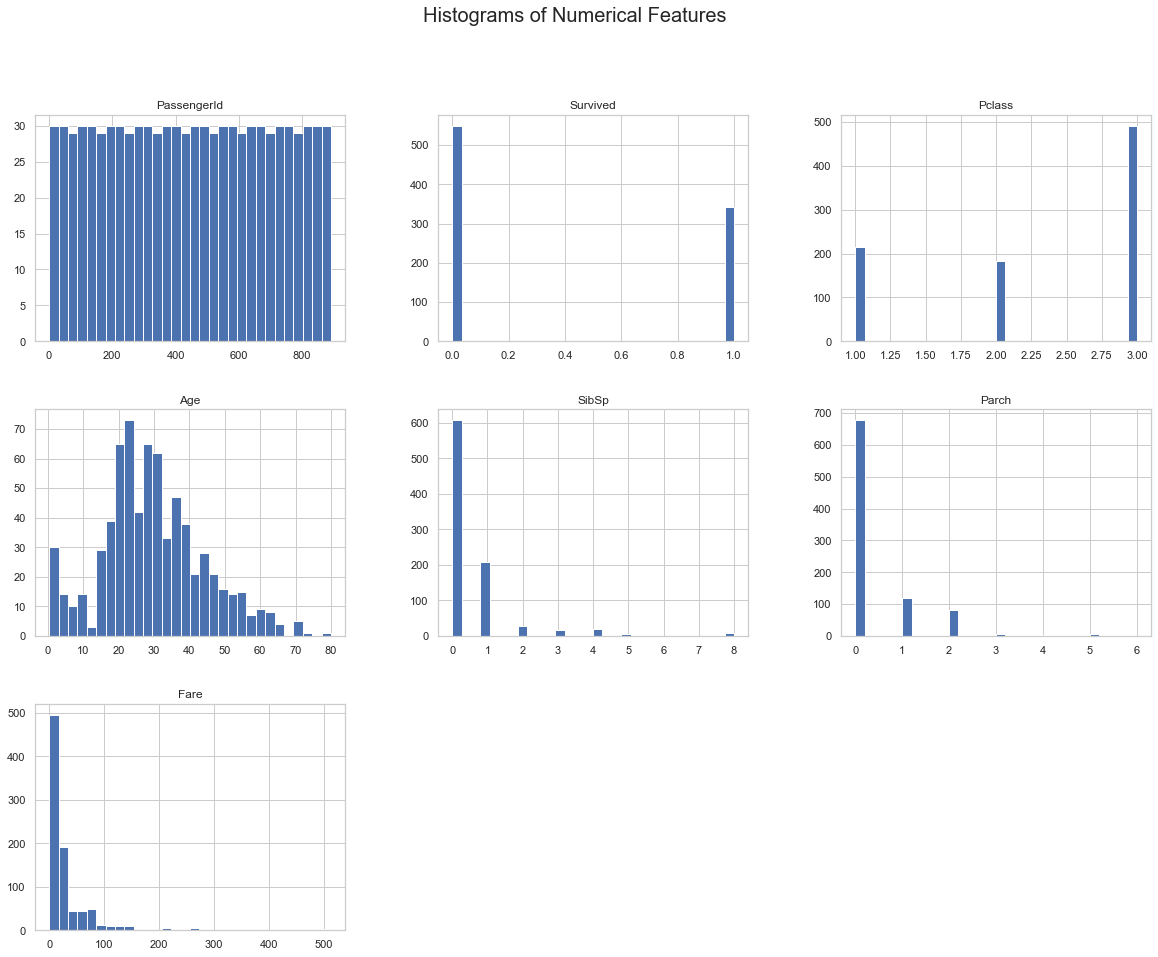

In [12]:
# Histograms for numerical features
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', size=20)
plt.show()

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRAP

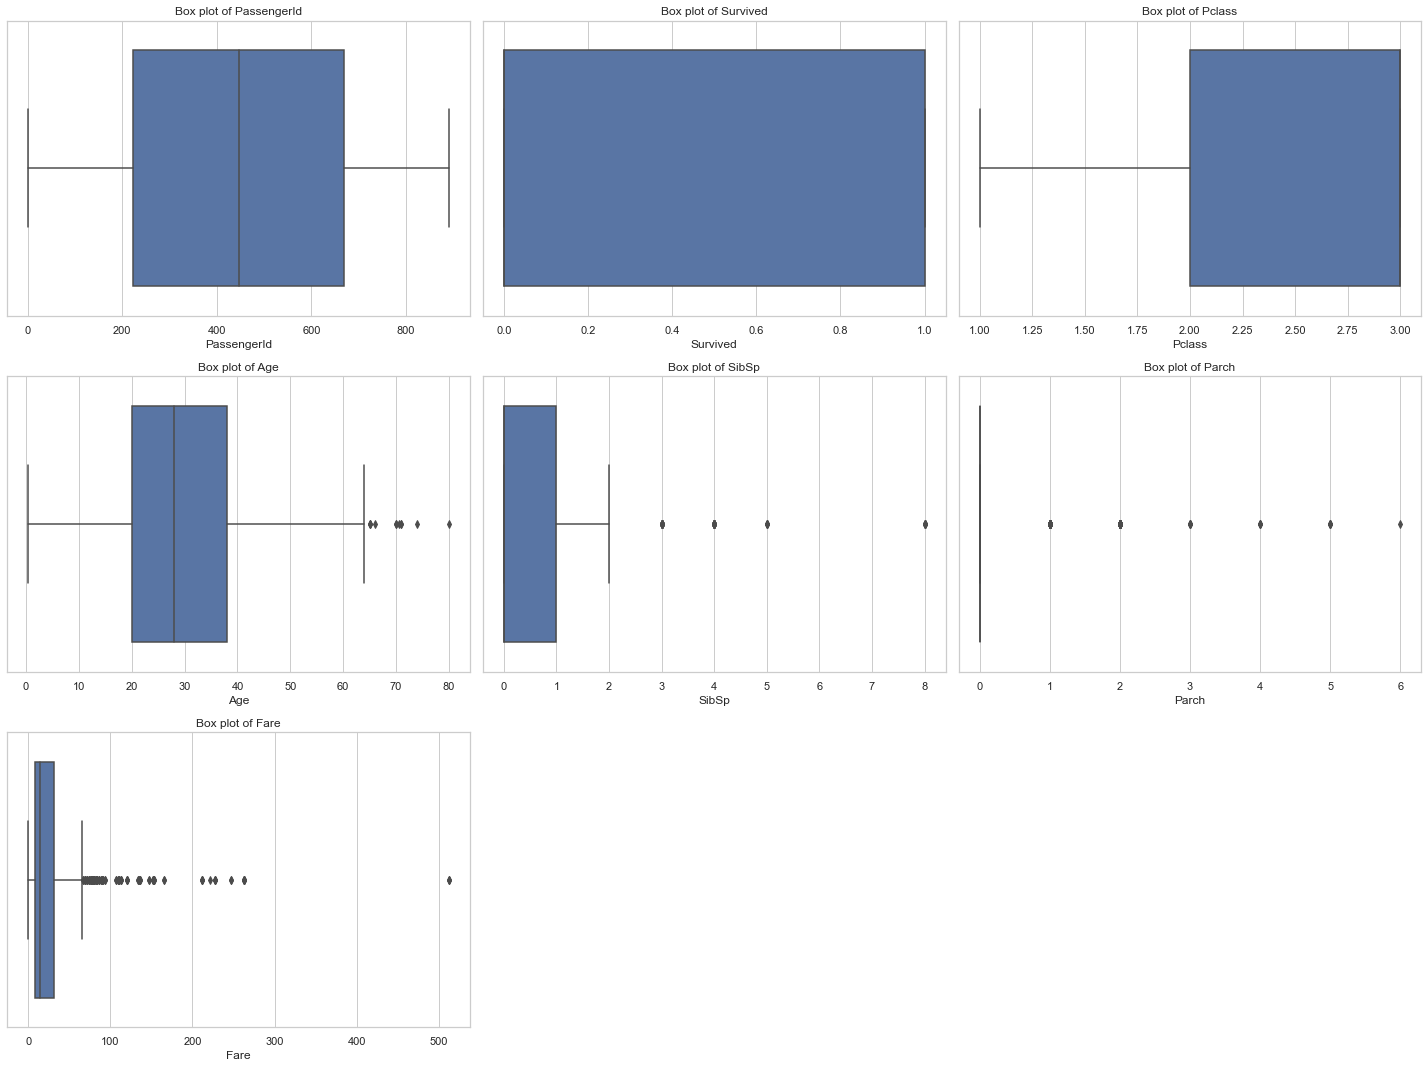

In [13]:
# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

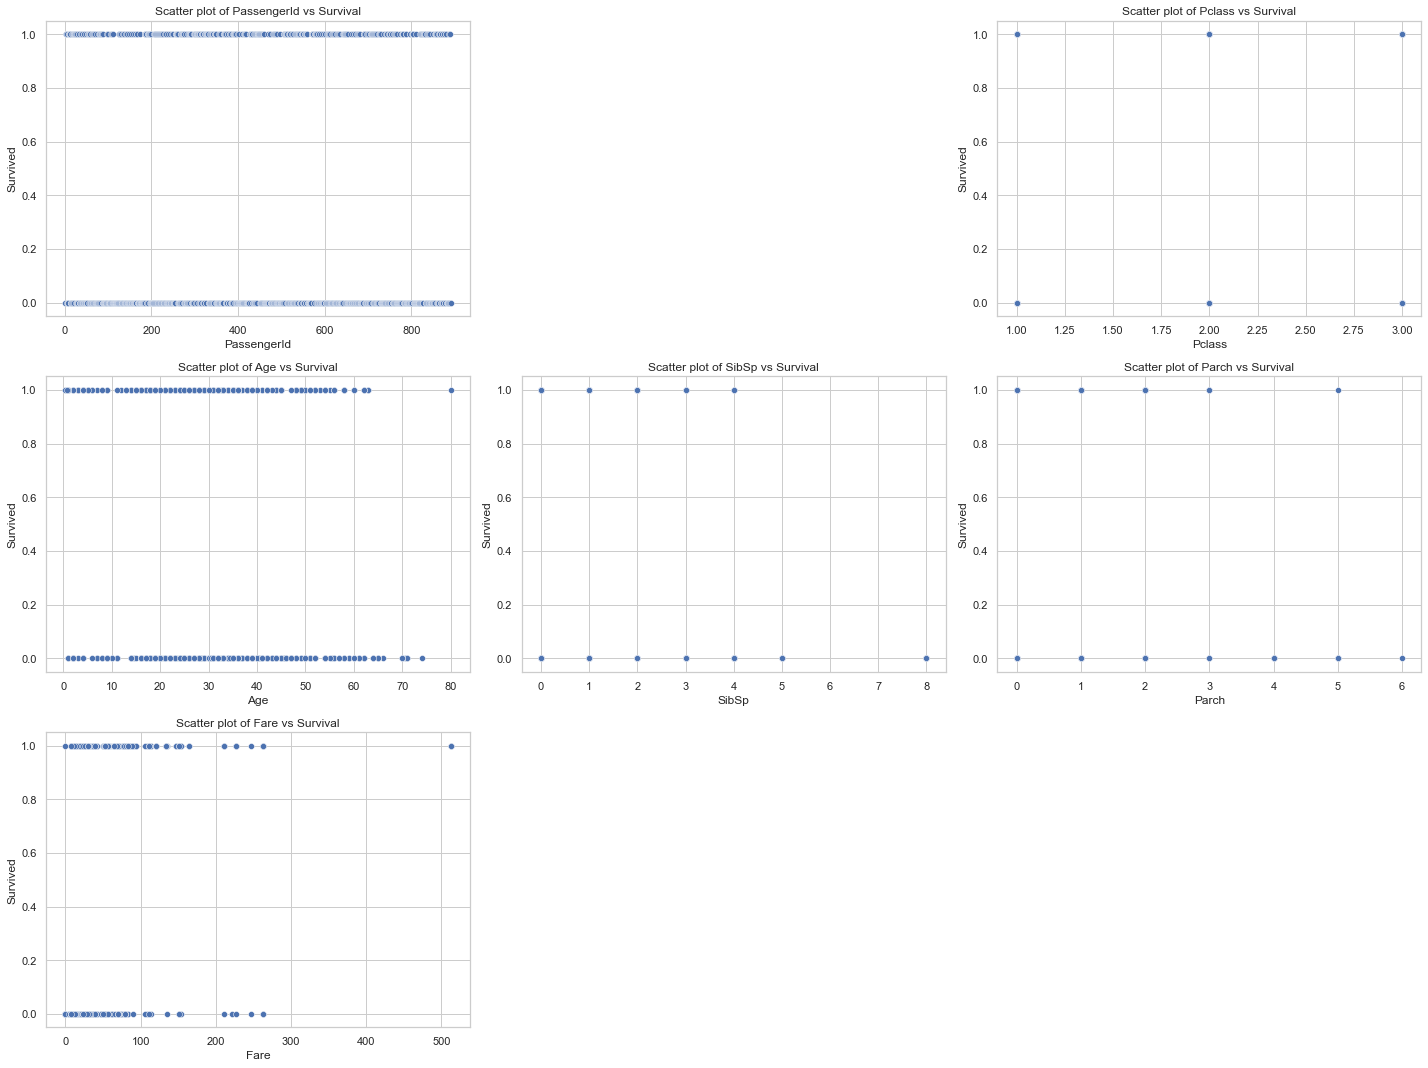

In [14]:
# Scatter plots for numerical features vs Survival
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_df.select_dtypes(include=['float64', 'int64']).columns, 1):
    if column != 'Survived':
        plt.subplot(3, 3, i)
        sns.scatterplot(x=train_df[column], y=train_df['Survived'])
        plt.title(f'Scatter plot of {column} vs Survival')
plt.tight_layout()
plt.show()

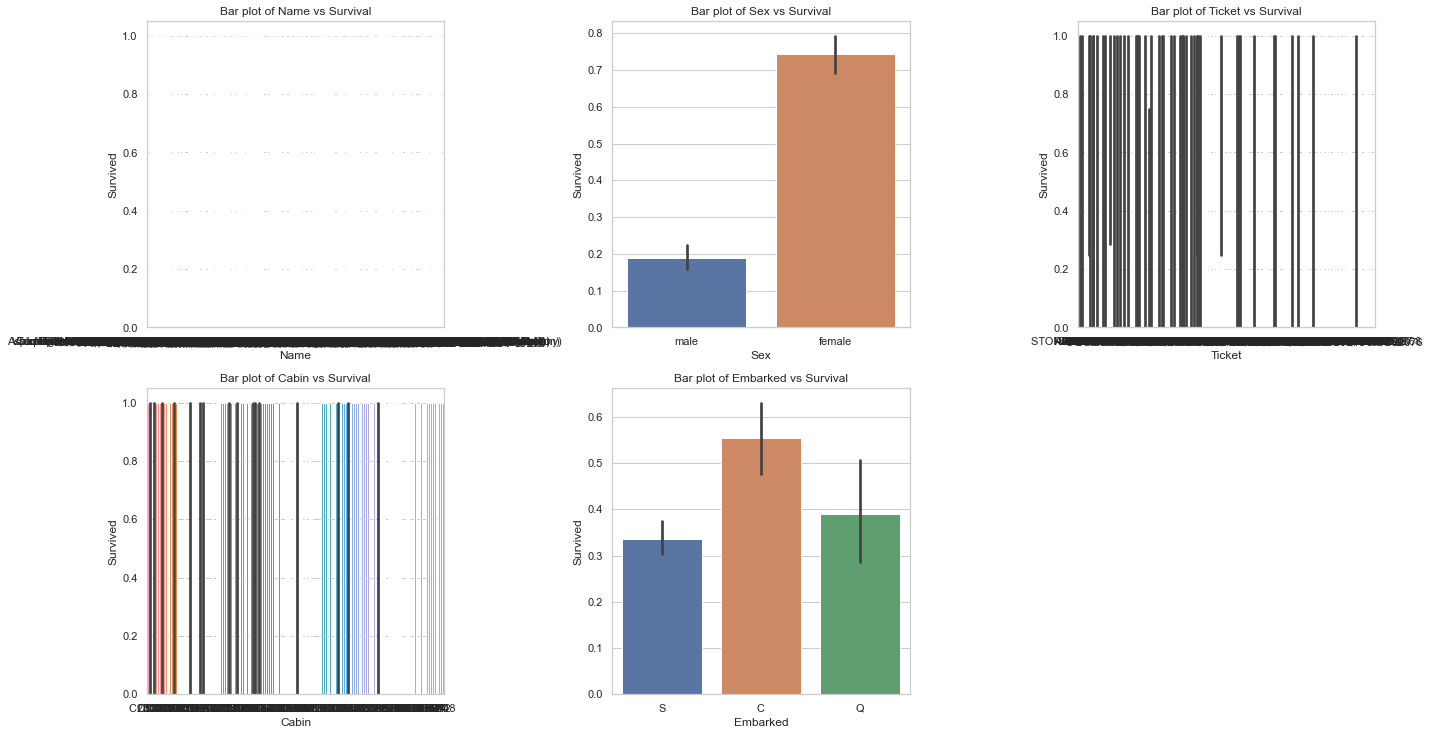

In [15]:
# Bar plots for categorical features vs Survival
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=train_df[column], y=train_df['Survived'])
    plt.title(f'Bar plot of {column} vs Survival')
plt.tight_layout()
plt.show()

# Data Preprocessing:

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
# Impute missing values for 'Age' and 'Fare' with the median
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])
train_df['Fare'] = imputer.fit_transform(train_df[['Fare']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])

In [18]:
# Impute missing values for 'Embarked' with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
train_df['Embarked'] = imputer.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = imputer.transform(test_df[['Embarked']])

In [19]:
# Impute missing values for 'Cabin' with a placeholder
train_df['Cabin'].fillna('Unknown', inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

In [20]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


In [21]:
# Ensure train and test datasets have the same columns after one-hot encoding
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0


In [22]:
test_df = test_df[train_df.columns.difference(['Survived'])]

In [23]:
# Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [24]:
# Create a new feature 'IsAlone'
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
num_features = ['Age', 'Fare', 'FamilySize']
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features] = scaler.transform(test_df[num_features])

In [26]:
# Drop unnecessary features
train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [27]:
# Display the first few rows of the preprocessed train dataset
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize,IsAlone
0,0,-0.565736,1,0,-0.502445,1,0,1,0,1,0.059160,0
1,1,0.663861,1,0,0.786845,0,0,0,0,0,0.059160,0
2,1,-0.258337,0,0,-0.488854,0,0,1,0,1,-0.560975,1
3,1,0.433312,1,0,0.420730,0,0,1,0,0,0.059160,0
4,0,0.433312,0,0,-0.486337,1,0,1,0,1,-0.560975,1


# Building Predictive Models:

Split the Preprocessed Dataset into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Define the features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Display the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)


Define Evaluation Metrics Function

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [38]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

Build Predictive Models Using LightGBM and XGBoost

LightGBM

In [40]:
!pip install lightgbm 


In [41]:
import lightgbm as lgb


In [42]:
# Create the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)


In [43]:
# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(random_state=42)

In [44]:
# Predict on the test set
lgb_y_pred = lgb_model.predict(X_test)

In [45]:
# Evaluate the model
print("LightGBM Model Performance:")
evaluate_model(y_test, lgb_y_pred)

LightGBM Model Performance:
Accuracy: 0.8324
Precision: 0.8235
Recall: 0.7568
F1 Score: 0.7887

Confusion Matrix:
 [[93 12]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



XGBoost

In [47]:
!pip install xgboost 


In [48]:
import xgboost as xgb


In [49]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [50]:
# Train the model
xgb_model.fit(X_train, y_train)

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:37:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [51]:
# Predict on the test set
xgb_y_pred = xgb_model.predict(X_test)


In [52]:
# Evaluate the model
print("XGBoost Model Performance:")
evaluate_model(y_test, xgb_y_pred)

XGBoost Model Performance:
Accuracy: 0.7989
Precision: 0.7568
Recall: 0.7568
F1 Score: 0.7568

Confusion Matrix:
 [[87 18]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Cross-Validation and Hyperparameter Tuning for LightGBM

In [53]:
from sklearn.model_selection import GridSearchCV


In [54]:
# Define the parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}


In [55]:
# Create the GridSearchCV object
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [56]:
# Fit the model
lgb_grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='accuracy')

In [57]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV for LightGBM:", lgb_grid.best_params_)
print("Best cross-validation score for LightGBM:", lgb_grid.best_score_)


Best parameters found by GridSearchCV for LightGBM: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validation score for LightGBM: 0.8272530286614794


In [58]:
# Predict on the test set with the best estimator
lgb_best_model = lgb_grid.best_estimator_
lgb_best_y_pred = lgb_best_model.predict(X_test)


In [59]:
# Evaluate the model
print("Optimized LightGBM Model Performance:")
evaluate_model(y_test, lgb_best_y_pred)

Optimized LightGBM Model Performance:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Cross-Validation and Hyperparameter Tuning for XGBoost

In [60]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [61]:
# Create the GridSearchCV object
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [62]:
# Fit the model
xgb_grid.fit(X_train, y_train)


C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:40:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [63]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV for XGBoost:", xgb_grid.best_params_)
print("Best cross-validation score for XGBoost:", xgb_grid.best_score_)


Best parameters found by GridSearchCV for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score for XGBoost: 0.8370432384516893


In [64]:
# Predict on the test set with the best estimator
xgb_best_model = xgb_grid.best_estimator_
xgb_best_y_pred = xgb_best_model.predict(X_test)


In [65]:
# Evaluate the model
print("Optimized XGBoost Model Performance:")
evaluate_model(y_test, xgb_best_y_pred)

Optimized XGBoost Model Performance:
Accuracy: 0.8045
Precision: 0.8197
Recall: 0.6757
F1 Score: 0.7407

Confusion Matrix:
 [[94 11]
 [24 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



# Comparative Analysis:

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [67]:
# Define the evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    return accuracy, precision, recall, f1

In [68]:
# Split the preprocessed dataset into training and testing sets
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)
print("LightGBM Model Performance:")
lgb_metrics = evaluate_model(y_test, lgb_y_pred)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [70]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print("XGBoost Model Performance:")
xgb_metrics = evaluate_model(y_test, xgb_y_pred)

XGBoost Model Performance:
Accuracy: 0.7989
Precision: 0.7568
Recall: 0.7568
F1 Score: 0.7568

Confusion Matrix:
 [[87 18]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [73]:
import numpy as np
# Visualization of the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_values = lgb_metrics
xgb_values = xgb_metrics

In [74]:
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars


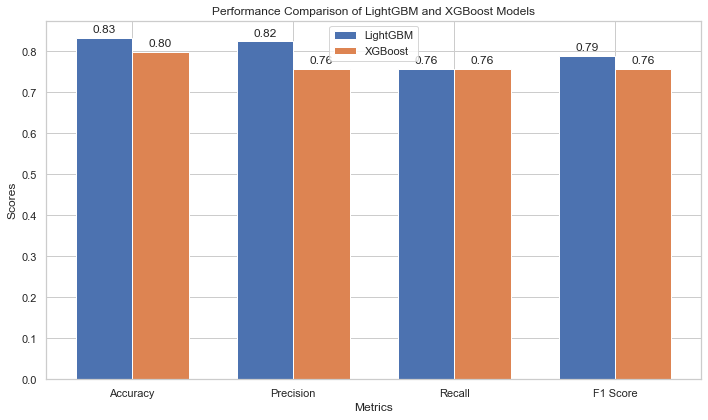

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_values, width, label='LightGBM')
rects2 = ax.bar(x + width/2, xgb_values, width, label='XGBoost')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of LightGBM and XGBoost Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()